In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from sklearn.compose import make_column_transformer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [ ]:
data= pd.read_csv("/content/Parkinsson disease.csv")

In [ ]:
about_list = ["ASCII subject name and recording number",
              "Average vocal fundamental frequency",
              "Maximum vocal fundamental frequency",
              "Minimum vocal fundamental frequency" ,
              "Measure of variation in fundamental frequency",
              "Measure of variation in fundamental frequency",
              "Measure of variation in fundamental frequency",
              "Measure of variation in fundamental frequency",
              "Measure of variation in fundamental frequency",
              "Measures of variation in amplitude",
              "Measures of variation in amplitude",
              "Measures of variation in amplitude",
              "Measures of variation in amplitude",
              "Measures of variation in amplitude",
              "Measures of variation in amplitude",
              "Measures of ratio of noise to tonal components in the voice",
              "Measures of ratio of noise to tonal components in the voice",
              "Health status of the subject (one) - Parkinson's, (zero) - healthy",
              "Two nonlinear dynamical complexity measures",
              "Two nonlinear dynamical complexity measures",
              "Signal fractal scaling exponent" ,
              "Nonlinear measures of fundamental frequency variation",
              "Nonlinear measures of fundamental frequency variation",
              "Nonlinear measures of fundamental frequency variation"]

In [ ]:
about = pd.DataFrame({"Names":data.columns, "Description":about_list})
about

,Names,Description
0,name,ASCII subject name and recording number
1,MDVP:Fo(Hz),Average vocal fundamental frequency
2,MDVP:Fhi(Hz),Maximum vocal fundamental frequency
3,MDVP:Flo(Hz),Minimum vocal fundamental frequency
4,MDVP:Jitter(%),Measure of variation in fundamental frequency
5,MDVP:Jitter(Abs),Measure of variation in fundamental frequency
6,MDVP:RAP,Measure of variation in fundamental frequency
7,MDVP:PPQ,Measure of variation in fundamental frequency
8,Jitter:DDP,Measure of variation in fundamental frequency
9,MDVP:Shimmer,Measures of variation in amplitude


In [ ]:
about_list = ["ASCII subject name and recording number",
              "Average vocal fundamental frequency",
              "Maximum vocal fundamental frequency",
              "Minimum vocal fundamental frequency" ,
              "Measure of variation in fundamental frequency",
              "Measure of variation in fundamental frequency",
              "Measure of variation in fundamental frequency",
              "Measure of variation in fundamental frequency",
              "Measure of variation in fundamental frequency",
              "Measures of variation in amplitude",
              "Measures of variation in amplitude",
              "Measures of variation in amplitude",
              "Measures of variation in amplitude",
              "Measures of variation in amplitude",
              "Measures of variation in amplitude",
              "Measures of ratio of noise to tonal components in the voice",
              "Measures of ratio of noise to tonal components in the voice",
              "Health status of the subject (one) - Parkinson's, (zero) - healthy",
              "Two nonlinear dynamical complexity measures",
              "Two nonlinear dynamical complexity measures",
              "Signal fractal scaling exponent" ,
              "Nonlinear measures of fundamental frequency variation",
              "Nonlinear measures of fundamental frequency variation",
              "Nonlinear measures of fundamental frequency variation"]

In [ ]:
len(about_list)

24

In [ ]:
# about[]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [ ]:
data.head(10)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
5,phon_R01_S01_6,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,...,0.06985,0.01222,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
6,phon_R01_S02_1,120.267,137.244,114.820,0.00333,0.00003,0.00155,0.00202,0.00466,0.01608,...,0.02337,0.00607,24.886,1,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756
7,phon_R01_S02_2,107.332,113.840,104.315,0.00290,0.00003,0.00144,0.00182,0.00431,0.01567,...,0.02487,0.00344,26.892,1,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755
8,phon_R01_S02_3,95.730,132.068,91.754,0.00551,0.00006,0.00293,0.00332,0.00880,0.02093,...,0.03218,0.01070,21.812,1,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
9,phon_R01_S02_4,95.056,120.103,91.226,0.00532,0.00006,0.00268,0.00332,0.00803,0.02838,...,0.04324,0.01022,21.862,1,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362


In [ ]:
attributes = data.columns[:23]

In [ ]:
# sns.set(style = "darkgrid")
# sns.distplot(data, bins=23, color='b', kde = True )

In [ ]:
# data.hist(subplots= True, layout=(8, 3), figsize = (13, 18), legend= False)
# plt.tight_layout()

In [ ]:
data.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [ ]:
(data["status"] == 1).sum()

147

In [ ]:
(data["status"] == 0).sum()

48

In [ ]:
data.drop(columns="name", inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MDVP:Fo(Hz)       195 non-null    float64
 1   MDVP:Fhi(Hz)      195 non-null    float64
 2   MDVP:Flo(Hz)      195 non-null    float64
 3   MDVP:Jitter(%)    195 non-null    float64
 4   MDVP:Jitter(Abs)  195 non-null    float64
 5   MDVP:RAP          195 non-null    float64
 6   MDVP:PPQ          195 non-null    float64
 7   Jitter:DDP        195 non-null    float64
 8   MDVP:Shimmer      195 non-null    float64
 9   MDVP:Shimmer(dB)  195 non-null    float64
 10  Shimmer:APQ3      195 non-null    float64
 11  Shimmer:APQ5      195 non-null    float64
 12  MDVP:APQ          195 non-null    float64
 13  Shimmer:DDA       195 non-null    float64
 14  NHR               195 non-null    float64
 15  HNR               195 non-null    float64
 16  status            195 non-null    int64  
 1

In [ ]:
data.status.value_counts()

status
1    147
0     48
Name: count, dtype: int64

In [ ]:
for i in range(0, 22, 1):
  print(f"The column {i} named as {data.columns[i]} have {len(data.iloc[:, i].unique())} unique values")

The column 0 named as MDVP:Fo(Hz) have 195 unique values
The column 1 named as MDVP:Fhi(Hz) have 195 unique values
The column 2 named as MDVP:Flo(Hz) have 195 unique values
The column 3 named as MDVP:Jitter(%) have 173 unique values
The column 4 named as MDVP:Jitter(Abs) have 19 unique values
The column 5 named as MDVP:RAP have 155 unique values
The column 6 named as MDVP:PPQ have 165 unique values
The column 7 named as Jitter:DDP have 180 unique values
The column 8 named as MDVP:Shimmer have 188 unique values
The column 9 named as MDVP:Shimmer(dB) have 149 unique values
The column 10 named as Shimmer:APQ3 have 184 unique values
The column 11 named as Shimmer:APQ5 have 189 unique values
The column 12 named as MDVP:APQ have 189 unique values
The column 13 named as Shimmer:DDA have 189 unique values
The column 14 named as NHR have 185 unique values
The column 15 named as HNR have 195 unique values
The column 16 named as status have 2 unique values
The column 17 named as RPDE have 195 uni

In [ ]:
l=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
for i in range(0, 22, 1):
  l[i] = len(data.iloc[:, i].unique())

Text(0, 0.5, 'Column Number')

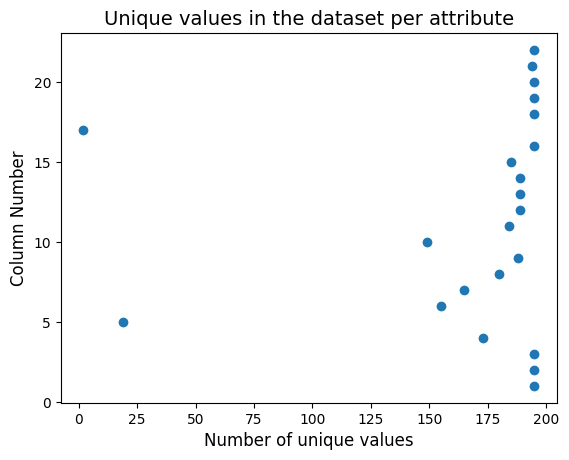

In [ ]:
plt.scatter(l, np.arange(1, 23))
plt.title("Unique values in the dataset per attribute", fontsize=(14))
plt.xlabel("Number of unique values", fontsize=(12))
plt.ylabel("Column Number", fontsize=(12))


In [ ]:
X=data.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17, 18, 19, 20, 21]]
y=data.iloc[:, [16]]
#X = data.drop(columns = "status", axis =1)
#y = data["status"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
scaler = MinMaxScaler().fit(X_train)
print(scaler)

MinMaxScaler()


In [ ]:
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)

In [ ]:
# set the random seed
tf.random.set_seed(42)

# creating the model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(64),
    tf.keras.layers.Dense(32),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Creating a callback
lr_c = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 *(10**(epoch/20)))

# compiling the model
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer="Adam",
              metrics=["accuracy"])

# fit the model
history = model.fit(X_train_norm, y_train, epochs=300, callbacks=[lr_c], verbose=1)

Epoch 1/300
5/5 [==============================] - 2s 8ms/step - loss: 0.7462 - accuracy: 0.2885 - lr: 1.0000e-04
Epoch 2/300
5/5 [==============================] - 0s 5ms/step - loss: 0.7183 - accuracy: 0.3974 - lr: 1.1220e-04
Epoch 3/300
5/5 [==============================] - 0s 5ms/step - loss: 0.6898 - accuracy: 0.5513 - lr: 1.2589e-04
Epoch 4/300
5/5 [==============================] - 0s 4ms/step - loss: 0.6618 - accuracy: 0.6987 - lr: 1.4125e-04
Epoch 5/300
5/5 [==============================] - 0s 6ms/step - loss: 0.6341 - accuracy: 0.7244 - lr: 1.5849e-04
Epoch 6/300
5/5 [==============================] - 0s 5ms/step - loss: 0.6079 - accuracy: 0.7308 - lr: 1.7783e-04
Epoch 7/300
5/5 [==============================] - 0s 6ms/step - loss: 0.5832 - accuracy: 0.7372 - lr: 1.9953e-04
Epoch 8/300
5/5 [==============================] - 0s 6ms/step - loss: 0.5629 - accuracy: 0.7500 - lr: 2.2387e-04
Epoch 9/300
5/5 [==============================] - 0s 5ms/step - loss: 0.5429 - accuracy

In [ ]:
model.evaluate(X_test_norm, y_test)

2/2 [==============================] - 0s 11ms/step - loss: nan - accuracy: 0.1795


[nan, 0.1794871836900711]

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1408      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3521 (13.75 KB)
Trainable params: 3521 (13.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
X_test.shape, y_test.shape

((39, 21), (39, 1))

<Axes: >

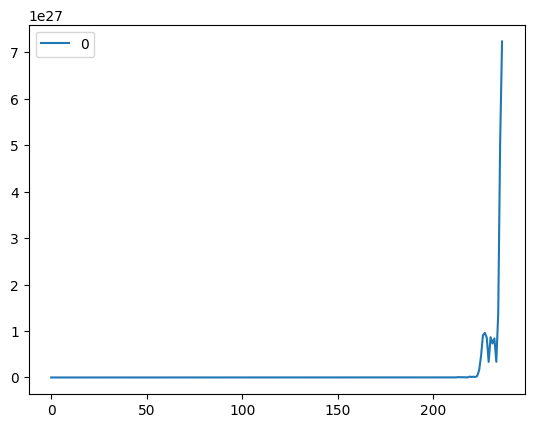

In [ ]:
pd.DataFrame(history.history["loss"]).plot()

In [ ]:
lrs = 1e-4 *(10**(tf.range(300)/20))

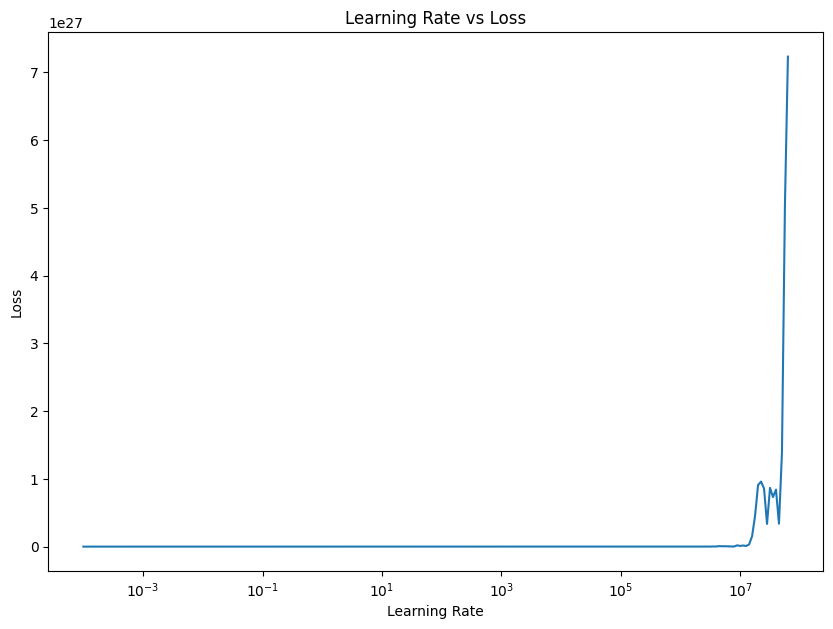

In [ ]:
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning Rate vs Loss");

In [ ]:
y_train.shape, X_train_norm.shape

((156, 1), (156, 21))

In [ ]:
# Creating a model with ideal learningrate

# Setting the random seed
tf.random.set_seed(42)

# Creating the model
model_1=tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation="sigmoid")
])
# Compile the model
model_1.compile(loss="BinaryCrossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
                metrics=["accuracy"])
# Fit the training data into the model
history_1 = model_1.fit(X_train_norm, y_train, epochs= 50, verbose=1, validation_data=(X_test_norm, y_test))

Epoch 1/50
5/5 [==============================] - 1s 66ms/step - loss: 0.7477 - accuracy: 0.7564 - val_loss: 0.3501 - val_accuracy: 0.8974
Epoch 2/50
5/5 [==============================] - 0s 14ms/step - loss: 0.3974 - accuracy: 0.8205 - val_loss: 0.3430 - val_accuracy: 0.8974
Epoch 3/50
5/5 [==============================] - 0s 13ms/step - loss: 0.3551 - accuracy: 0.8397 - val_loss: 0.3619 - val_accuracy: 0.8974
Epoch 4/50
5/5 [==============================] - 0s 14ms/step - loss: 0.3017 - accuracy: 0.8718 - val_loss: 0.3454 - val_accuracy: 0.8718
Epoch 5/50
5/5 [==============================] - 0s 14ms/step - loss: 0.2830 - accuracy: 0.8846 - val_loss: 0.3892 - val_accuracy: 0.8974
Epoch 6/50
5/5 [==============================] - 0s 11ms/step - loss: 0.2816 - accuracy: 0.8846 - val_loss: 0.3772 - val_accuracy: 0.8718
Epoch 7/50
5/5 [==============================] - 0s 14ms/step - loss: 0.2895 - accuracy: 0.8718 - val_loss: 0.3362 - val_accuracy: 0.8718
Epoch 8/50
5/5 [===========

In [ ]:
model_1.evaluate(X_test_norm, y_test)[1]*100

2/2 [==============================] - 0s 8ms/step - loss: 0.5591 - accuracy: 0.8974


89.74359035491943

Text(0.5, 0, 'Number of epochs')

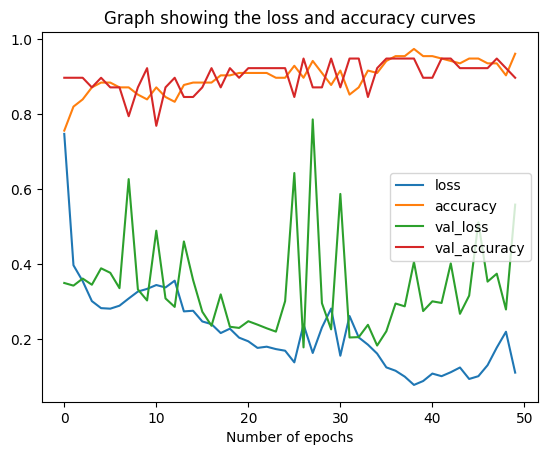

In [ ]:
pd.DataFrame(history_1.history).plot()
plt.title("Graph showing the loss and accuracy curves")
plt.xlabel("Number of epochs")

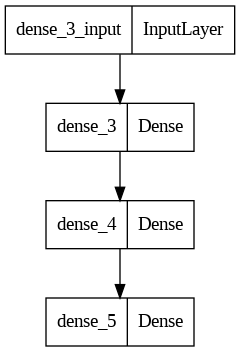

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model = model_1)

In [ ]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                1408      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3521 (13.75 KB)
Trainable params: 3521 (13.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MDVP:Fo(Hz)       195 non-null    float64
 1   MDVP:Fhi(Hz)      195 non-null    float64
 2   MDVP:Flo(Hz)      195 non-null    float64
 3   MDVP:Jitter(%)    195 non-null    float64
 4   MDVP:Jitter(Abs)  195 non-null    float64
 5   MDVP:RAP          195 non-null    float64
 6   MDVP:PPQ          195 non-null    float64
 7   Jitter:DDP        195 non-null    float64
 8   MDVP:Shimmer      195 non-null    float64
 9   MDVP:Shimmer(dB)  195 non-null    float64
 10  Shimmer:APQ3      195 non-null    float64
 11  Shimmer:APQ5      195 non-null    float64
 12  MDVP:APQ          195 non-null    float64
 13  Shimmer:DDA       195 non-null    float64
 14  NHR               195 non-null    float64
 15  HNR               195 non-null    float64
 16  status            195 non-null    int64  
 1

In [ ]:
X_train_norm.shape, y_train.shape

((156, 21), (156, 1))

In [ ]:
y_preds = tf.squeeze(tf.round(model_1.predict(X_test_norm)))

2/2 [==============================] - 0s 5ms/step


In [ ]:
tf.unique(y_preds)

Unique(y=<tf.Tensor: shape=(2,), dtype=float32, numpy=array([1., 0.], dtype=float32)>, idx=<tf.Tensor: shape=(39,), dtype=int32, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=int32)>)

In [ ]:
cfg = confusion_matrix(y_preds, y_test)
cfg

array([[ 4,  1],
       [ 3, 31]])

Text(50.722222222222214, 0.5, 'Actual/ True Values')

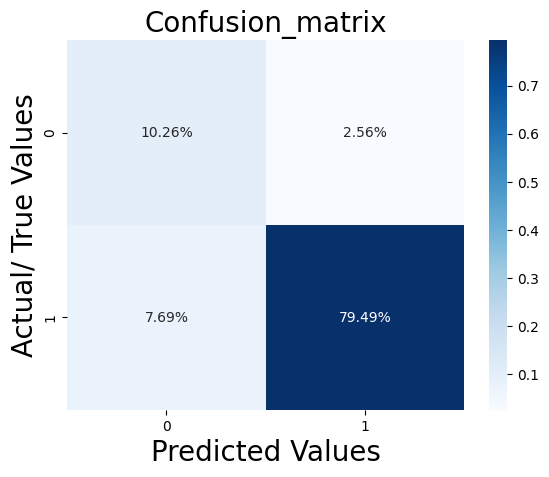

In [ ]:
sns.heatmap((cfg/np.sum(cfg)),
            fmt="0.2%",
            annot=True,
            cmap = "Blues",
            xticklabels = (0, 1),
            yticklabels = [0, 1]
            )
plt.title("Confusion_matrix", fontsize=20)
plt.xlabel("Predicted Values", fontsize=20)
plt.ylabel("Actual/ True Values", fontsize=20)

In [ ]:
tf.squeeze(y_preds[:10])

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], dtype=float32)>

In [ ]:
y_test[:10]

,status
138,1
16,1
155,1
96,1
68,1
153,1
55,1
15,1
112,1
111,1


In [ ]:
X_test_norm, y_test

(array([[0.13917286, 0.04993825, 0.22233929, 0.09656925, 0.13043478,
         0.08188825, 0.10610932, 0.08203564, 0.42806281, 0.35497124,
         0.50365948, 0.40162822, 0.28577992, 0.5037232 , 0.08161187,
         0.36271641, 0.89685497, 0.50645005, 0.42133932, 0.67475727,
         0.44307139],
        [0.32516941, 0.50443267, 0.09953136, 0.11944091, 0.13043478,
         0.06888247, 0.10718114, 0.06871087, 0.0997809 , 0.08792112,
         0.09899846, 0.08548168, 0.10375986, 0.09911414, 0.05710284,
         0.56457775, 0.72520714, 0.28051122, 0.45651156, 0.52561912,
         0.37422749],
        [0.17195468, 0.05144881, 0.17374233, 0.1521601 , 0.16996047,
         0.13872832, 0.11146838, 0.13854551, 0.19472339, 0.1569433 ,
         0.23189522, 0.16743555, 0.12887664, 0.23192964, 0.08167553,
         0.56856051, 0.86735063, 0.30972566, 0.7921351 , 0.45392025,
         0.45212174],
        [0.41207531, 0.13629321, 0.45675153, 0.05527319, 0.0513834 ,
         0.05298651, 0.04930332, 0.05

In [ ]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                1408      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3521 (13.75 KB)
Trainable params: 3521 (13.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
len(y_test), len(y_preds)

(39, 39)

In [ ]:
y_test.shape, y_preds.shape

((39, 1), TensorShape([39]))

<Axes: >

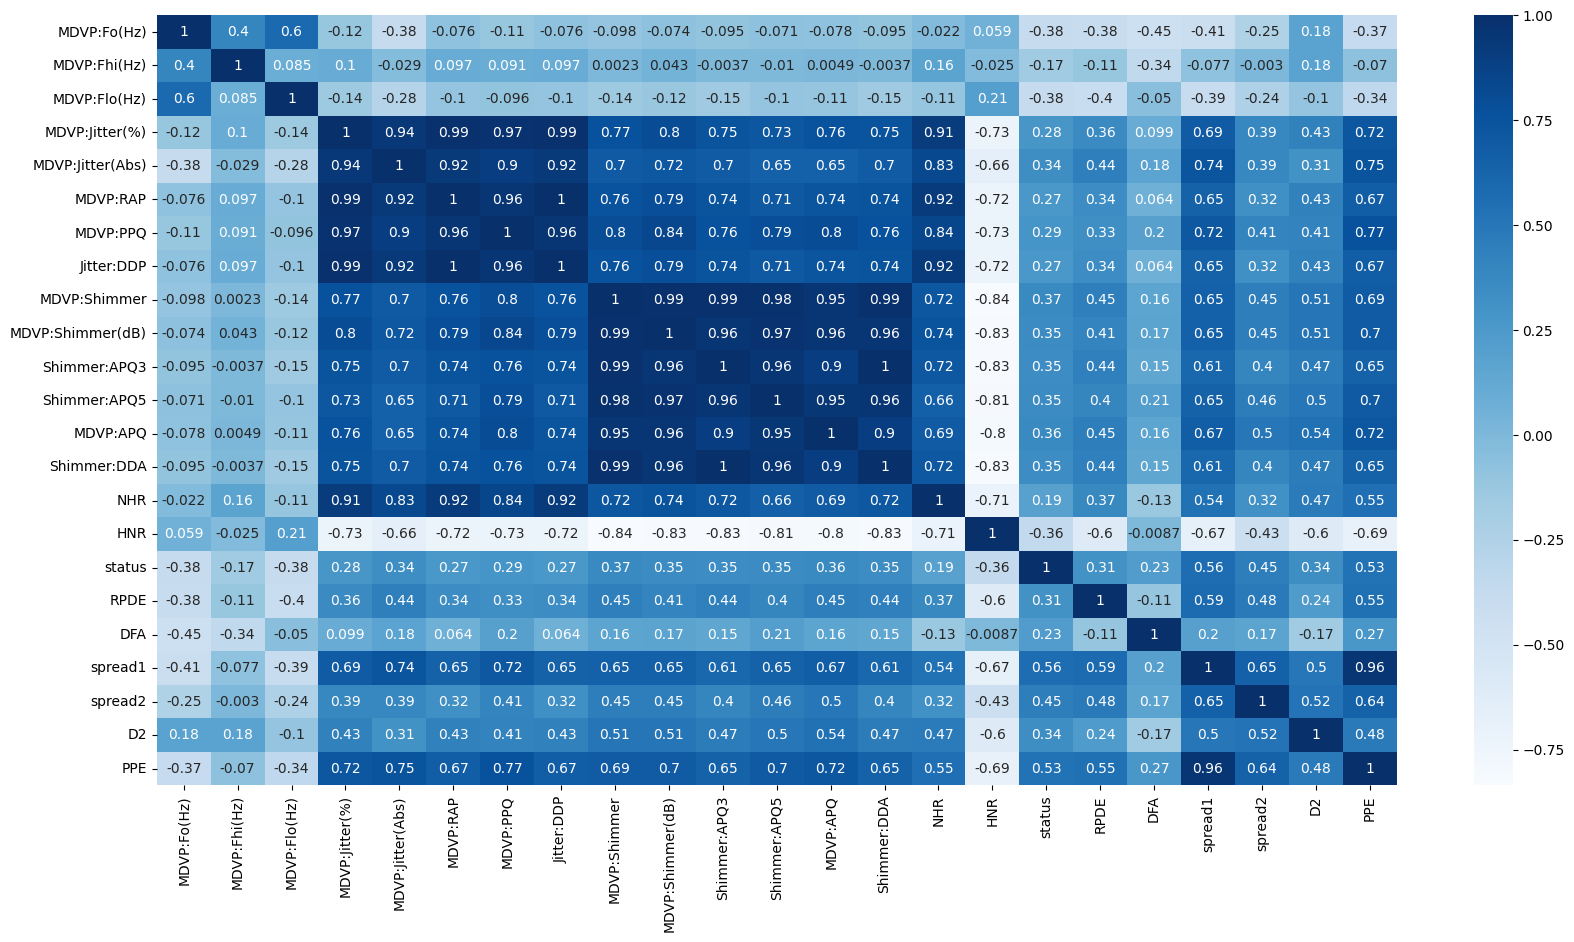

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr(), cmap="Blues", annot=True)

## Now using the machine learning algorithms to find the status of the patient

### SVM


In [ ]:
from sklearn.svm import SVC
model_2 = SVC()
model_2.fit(X_train_norm, y_train)
print("Accuracy: ", model_2.score(X_test_norm, y_test)*100)

# accuracy_2 = model_2.score(X_test_norm, y_test)

Accuracy:  89.74358974358975


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Gaussian naive bayes


In [ ]:
from sklearn.naive_bayes import GaussianNB
model_3 = GaussianNB()
model_3.fit(X_train_norm, y_train)
print("Accuracy: ", model_3.score(X_test_norm, y_test)*100)
model_3.predict(X_test_norm)

Accuracy:  69.23076923076923


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0])

### Desision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model_4 = DecisionTreeClassifier()
model_4.fit(X_train_norm, y_train)
print("Accuracy: ", model_4.score(X_test_norm, y_test)*100, "%")

Accuracy:  84.61538461538461 %


### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

model_5 = LogisticRegression()
model_5.fit(X_train_norm, y_train)
print("Accuracy: ", model_5.score(X_test_norm, y_test)*100)

Accuracy:  89.74358974358975


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_6 = RandomForestClassifier()
model_6.fit(X_train_norm, y_train)
print("Accuracy: ", model_6.score(X_test_norm, y_test)*100)

<ipython-input-55-babb22e81871>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_6.fit(X_train_norm, y_train)


Accuracy:  92.3076923076923


### KNN(k-nearest neighbour)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model_7 = KNeighborsClassifier()
model_7.fit(X_train_norm, y_train)
print("Accuracy: ", model_7.score(X_test_norm, y_test)*100)

Accuracy:  94.87179487179486


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


### XGBoost

In [ ]:
from xgboost import XGBClassifier

model_8 = XGBClassifier()
model_8.fit(X_train_norm, y_train)
print("Accuracy: ", model_8.score(X_test_norm, y_test)*100)

Accuracy:  92.3076923076923


### AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

model_9 = AdaBoostClassifier()
model_9.fit(X_train_norm, y_train)
print("Accuracy: ", model_9.score(X_test_norm, y_test)*100)

Accuracy:  87.17948717948718


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


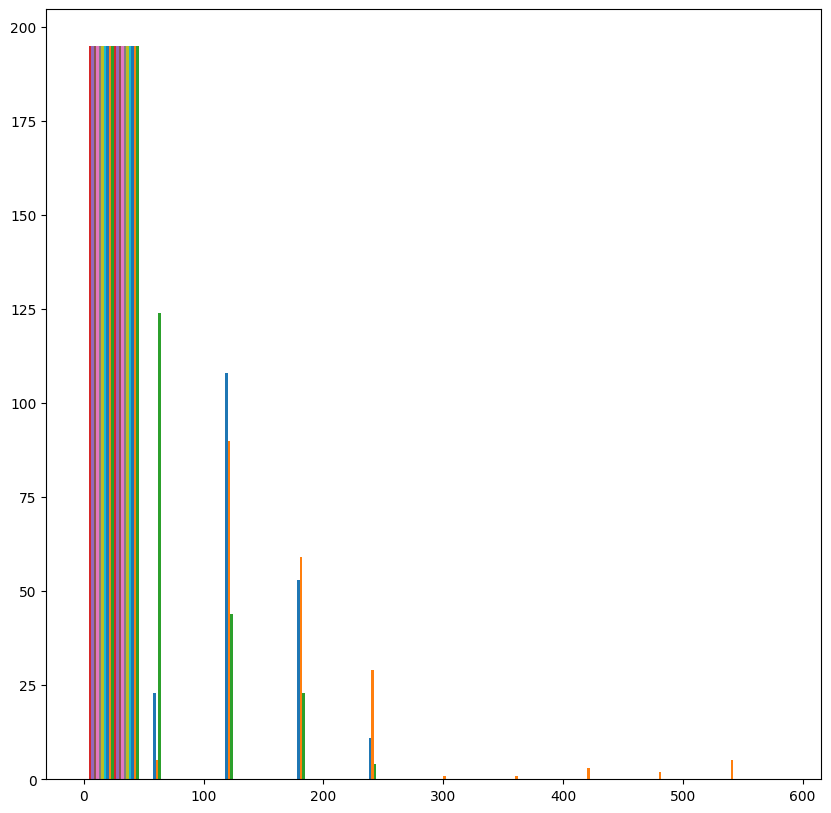

In [ ]:
plt.figure(figsize=(10, 10))
plt.hist(data)
plt.show()

In [ ]:
data

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [ ]:
confusion_matrix(y_test, model_3.predict(X_test_norm))

array([[ 5,  2],
       [10, 22]])

### Classification report for the data

In [ ]:
y_preds_1 = model_6.predict(X_test_norm)

In [ ]:
y_preds_2 = model_7.predict(X_test_norm)

In [ ]:
y_preds

<tf.Tensor: shape=(39,), dtype=float32, numpy=
array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1.], dtype=float32)>

In [ ]:
y_preds_1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1])

In [ ]:
y_preds_2

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1])

In [ ]:
print(classification_report(y_preds, y_test))

              precision    recall  f1-score   support

         0.0       0.57      0.80      0.67         5
         1.0       0.97      0.91      0.94        34

    accuracy                           0.90        39
   macro avg       0.77      0.86      0.80        39
weighted avg       0.92      0.90      0.90        39



In [ ]:
print(classification_report(y_preds_1, y_test))

              precision    recall  f1-score   support

           0       0.71      0.83      0.77         6
           1       0.97      0.94      0.95        33

    accuracy                           0.92        39
   macro avg       0.84      0.89      0.86        39
weighted avg       0.93      0.92      0.93        39



In [ ]:
print(classification_report(y_preds_2, y_test))

              precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       1.00      0.94      0.97        34

    accuracy                           0.95        39
   macro avg       0.86      0.97      0.90        39
weighted avg       0.96      0.95      0.95        39



In [ ]:
list_0 = [0.71, 1.00, 0.83, 0.95]

In [ ]:
list_1 = [1.00, 0.94, 0.97, 0.95]

In [ ]:
list = ["precision", "recall", "f1-score", "accuracy"]

In [ ]:
eval = pd.DataFrame([list_0, list_1], columns=list, index = [0, 1])
eval

,precision,recall,f1-score,accuracy
0,0.71,1.00,0.83,0.95
1,1.00,0.94,0.97,0.95


<Axes: >

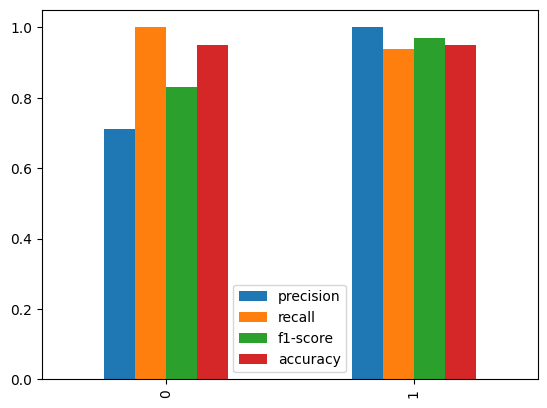

In [ ]:
 eval.plot(kind = 'bar')

Text(50.722222222222214, 0.5, 'Actual/ Target Values')

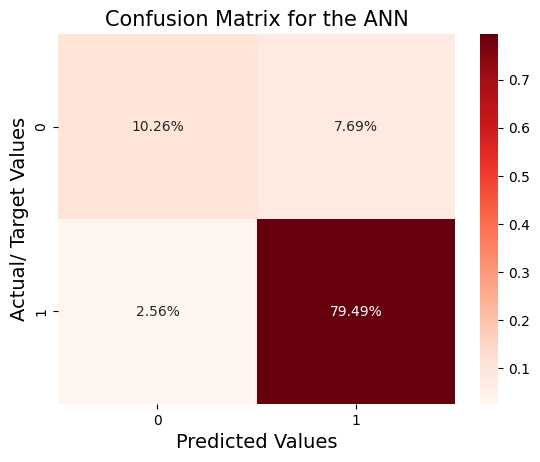

In [ ]:
sns.heatmap((confusion_matrix(y_test, y_preds)/np.sum(confusion_matrix(y_test, y_preds))),
            fmt="0.2%",
            annot=True,
            cmap="Reds")
plt.title("Confusion Matrix for the ANN", fontsize = 15)
plt.xlabel("Predicted Values", fontsize = 14)
plt.ylabel("Actual/ Target Values", fontsize = 14)

Text(50.722222222222214, 0.5, 'Actual/ Target Values')

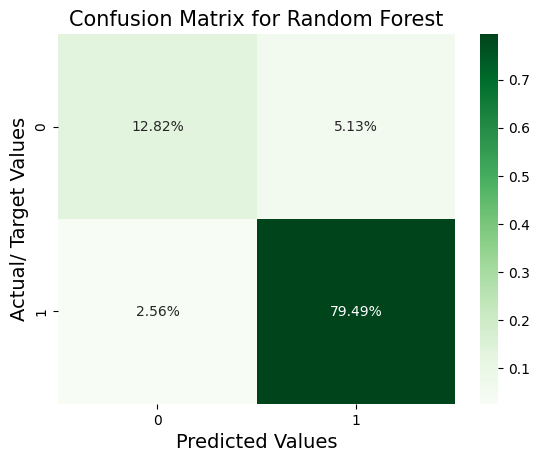

In [ ]:
sns.heatmap((confusion_matrix(y_test, y_preds_1)/np.sum(confusion_matrix(y_test, y_preds_1))),
            fmt = "0.2%",
            annot= True,
            cmap = "Greens")
plt.title("Confusion Matrix for Random Forest", fontsize = 15)
plt.xlabel("Predicted Values", fontsize = 14)
plt.ylabel("Actual/ Target Values", fontsize = 14)

Text(50.722222222222214, 0.5, 'Actual/ Target Values')

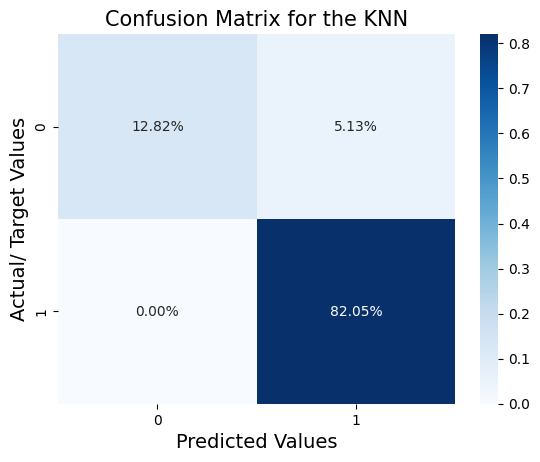

In [ ]:
sns.heatmap((confusion_matrix(y_test, y_preds_2)/np.sum(confusion_matrix(y_test, y_preds_2))),
            fmt = "0.2%",
            annot= True,
            cmap = "Blues")
plt.title("Confusion Matrix for the KNN", fontsize = 15)
plt.xlabel("Predicted Values", fontsize = 14)
plt.ylabel("Actual/ Target Values", fontsize = 14)

In [ ]:
print(classification_report(y_preds, y_test))

              precision    recall  f1-score   support

         0.0       0.57      0.80      0.67         5
         1.0       0.97      0.91      0.94        34

    accuracy                           0.90        39
   macro avg       0.77      0.86      0.80        39
weighted avg       0.92      0.90      0.90        39



### Code to save all the models

In [ ]:
# checking he accuracy of all the models
a1 = (model_1.evaluate(X_test_norm, y_test)[1])*100
a2 = model_2.score(X_test_norm, y_test)*100
a3 = model_3.score(X_test_norm, y_test)*100
a4 = model_4.score(X_test_norm, y_test)*100
a5 = model_5.score(X_test_norm, y_test)*100
a6 = model_6.score(X_test_norm, y_test)*100
a7 = model_7.score(X_test_norm, y_test)*100
a8 = model_8.score(X_test_norm, y_test)*100
a9 = model_9.score(X_test_norm, y_test)*100
a1, a2, a3, a4, a5, a6, a7, a8, a9
accuracy = [a1, a2, a3, a4, a5, a6, a7, a8, a9]
alas = np.expand_dims(accuracy, axis=0)
alas= np.squeeze(alas)
# accuracy = np.reshape(accuracy, (1, 9))

2/2 [==============================] - 0s 7ms/step - loss: 0.5591 - accuracy: 0.8974


In [ ]:
df = pd.DataFrame(accuracy, index= ["ANN", "SVM", "Gaussian Naive Bayes", "Decision Tree", "Logistic Regression", "Random Forest", "KNN","Extreme Gradient Boosting", "Adaboost"], columns=["accuracy/ score"])

<Axes: >

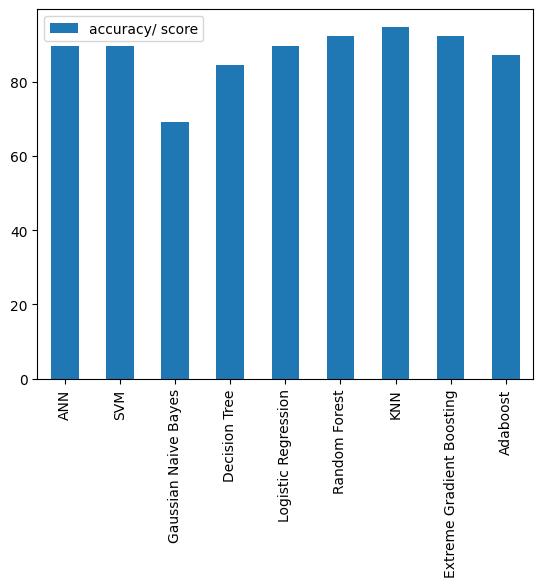

In [ ]:
df.plot(kind = "bar", )

In [ ]:
!pip install joblib

In [ ]:
model_1.save("ann9487.h5")
import joblib as jbl

jbl.dump(model_2, "svm8974.pkl")
jbl.dump(model_3, "gnb6923.pkl")
jbl.dump(model_4, "decision8461.pkl")
jbl.dump(model_5, "logistic8974.pkl")
jbl.dump(model_6, "rf9230.pkl")
jbl.dump(model_7, "knn9487.pkl")
jbl.dump(model_8, "xgb9487.pkl")
jbl.dump(model_9, "adb8718.pkl")


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


['adb8718.pkl']